In [1]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip --user

In [83]:
#!pip install tensorflow_probability 

In [ ]:
#data from https://www.kaggle.com/mlg-ulb/creditcardfraud

In [88]:
import pandas as pd
import h2o
import pandas_profiling
from pandas_profiling import ProfileReport
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tensorflow as tf

In [3]:
df=pd.read_csv("creditcard.csv")

In [4]:
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}},plot ={'histogram':{'bayesian_blocks_bins': False}})

In [8]:
profile.to_file(output_file="credit_report.html")

In [5]:
h2o.init(min_mem_size='20G')

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\Michael Lanier\AppData\Local\Continuum\anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MICHAE~1\AppData\Local\Temp\tmprmjmxccq
  JVM stdout: C:\Users\MICHAE~1\AppData\Local\Temp\tmprmjmxccq\h2o_Michael_Lanier_started_from_python.out
  JVM stderr: C:\Users\MICHAE~1\AppData\Local\Temp\tmprmjmxccq\h2o_Michael_Lanier_started_from_python.err
  Server is running at http://127.0.0.1:54385
Connecting to H2O server at http://127.0.0.1:54385 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.0.3
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_Michael_Lanier_v4vij9
H2O cluster total nodes:,1
H2O cluster free memory:,19.17 Gb
H2O cluster total cores:,12
H2O cluster allowed cores:,12
H2O cluster status:,"accepting new members, healthy"


In [57]:
data=h2o.import_file("creditcard.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
data

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.35981,-0.0727812,2.53635,1.37816,-0.338321,0.462388,0.239599,0.0986979,0.363787,0.0907942,-0.5516,-0.617801,-0.99139,-0.311169,1.46818,-0.470401,0.207971,0.0257906,0.403993,0.251412,-0.0183068,0.277838,-0.110474,0.0669281,0.128539,-0.189115,0.133558,-0.0210531,149.62,0
0,1.19186,0.266151,0.16648,0.448154,0.0600176,-0.0823608,-0.078803,0.0851017,-0.255425,-0.166974,1.61273,1.06524,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.0690831,-0.225775,-0.638672,0.101288,-0.339846,0.16717,0.125895,-0.0089831,0.0147242,2.69,0
1,-1.35835,-1.34016,1.77321,0.37978,-0.503198,1.8005,0.791461,0.247676,-1.51465,0.207643,0.624501,0.0660837,0.717293,-0.165946,2.34586,-2.89008,1.10997,-0.121359,-2.26186,0.52498,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.0553528,-0.0597518,378.66,0
1,-0.966272,-0.185226,1.79299,-0.863291,-0.0103089,1.2472,0.237609,0.377436,-1.38702,-0.0549519,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.05965,-0.684093,1.96578,-1.23262,-0.208038,-0.1083,0.0052736,-0.190321,-1.17558,0.647376,-0.221929,0.0627228,0.0614576,123.5,0
2,-1.15823,0.877737,1.54872,0.403034,-0.407193,0.0959215,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.34585,-1.11967,0.175121,-0.451449,-0.237033,-0.0381948,0.803487,0.408542,-0.0094307,0.798278,-0.137458,0.141267,-0.20601,0.502292,0.219422,0.215153,69.99,0
2,-0.425966,0.960523,1.14111,-0.168252,0.420987,-0.0297276,0.476201,0.260314,-0.568671,-0.371407,1.34126,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.0581328,0.0686531,-0.0331938,0.0849677,-0.208254,-0.559825,-0.0263977,-0.371427,-0.232794,0.105915,0.253844,0.0810803,3.67,0
4,1.22966,0.141004,0.0453708,1.20261,0.191881,0.272708,-0.005159,0.0812129,0.46496,-0.0992543,-1.41691,-0.153826,-0.751063,0.167372,0.0501436,-0.443587,0.00282051,-0.611987,-0.045575,-0.219633,-0.167716,-0.27071,-0.154104,-0.780055,0.750137,-0.257237,0.0345074,0.00516777,4.99,0
7,-0.644269,1.41796,1.07438,-0.492199,0.948934,0.428118,1.12063,-3.80786,0.615375,1.24938,-0.619468,0.291474,1.75796,-1.32387,0.686133,-0.076127,-1.22213,-0.358222,0.324505,-0.156742,1.94347,-1.01545,0.0575035,-0.649709,-0.415267,-0.0516343,-1.20692,-1.08534,40.8,0
7,-0.894286,0.286157,-0.113192,-0.271526,2.6696,3.72182,0.370145,0.851084,-0.392048,-0.41043,-0.705117,-0.110452,-0.286254,0.0743554,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.0527357,-0.0734251,-0.268092,-0.204233,1.01159,0.373205,-0.384157,0.0117474,0.142404,93.2,0
9,-0.338262,1.11959,1.04437,-0.222187,0.499361,-0.246761,0.651583,0.0695386,-0.736727,-0.366846,1.01761,0.83639,1.00684,-0.443523,0.150219,0.739453,-0.54098,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.38505,-0.069733,0.0941988,0.246219,0.0830756,3.68,0


In [59]:
x=data.columns
C=data['Class']
x.remove('Class')


In [63]:
fraud_dl =H2OAutoEncoderEstimator(hidden = [1000], epochs = 10, activation='Tanh')



fraud_anon = fraud_dl.train(x=x,training_frame=data)


deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [67]:
fraud_dl

Model Details
H2OAutoEncoderEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1583250069682_2


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 61,030 weights/biases, 734.8 KB, 1,699,936 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,30,Input,0,,,,,,,,,
1,,2,1000,Tanh,0,0,0,1.00422,1.09713e-154,0,-0.000762186,0.0459603,0,1.09713e-154
2,,3,30,Tanh,,0,0,1.00422,1.09713e-154,0,0.000120143,0.0456203,0,1.09713e-154




ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.004527924608079176
RMSE: 0.06728985516464704

Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-03-03 10:05:44,0.258 sec,0.00000 obs/sec,0.000000,0,0.0,0.067290,0.004528
1,,2020-03-03 10:05:58,14.093 sec,7287 obs/sec,0.350764,1,99900.0,0.977780,0.956054
2,,2020-03-03 10:06:12,28.448 sec,7166 obs/sec,0.701837,2,199888.0,0.989903,0.979907
3,,2020-03-03 10:06:27,43.083 sec,7076 obs/sec,1.053247,3,299972.0,0.973364,0.947438
4,,2020-03-03 10:06:41,57.880 sec,7008 obs/sec,1.403782,4,399807.0,0.982142,0.964603
5,,2020-03-03 10:06:56,1 min 12.822 sec,6960 obs/sec,1.756147,5,500163.0,0.972336,0.945437
6,,2020-03-03 10:07:11,1 min 27.781 sec,6920 obs/sec,2.106216,6,599865.0,0.961172,0.923851
7,,2020-03-03 10:07:26,1 min 42.906 sec,6883 obs/sec,2.457190,7,699825.0,0.973291,0.947295
8,,2020-03-03 10:07:43,1 min 59.357 sec,6780 obs/sec,2.808744,8,799950.0,0.951564,0.905474
9,,2020-03-03 10:07:58,2 min 14.535 sec,6766 obs/sec,3.160365,9,900094.0,0.949129,0.900845



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,V6,1.000000,1.000000,0.034408
1,V13,0.997742,0.997742,0.034331
2,V27,0.993157,0.993157,0.034173
3,V14,0.992173,0.992173,0.034139
4,V3,0.989579,0.989579,0.034050
5,V9,0.989454,0.989454,0.034046
6,V10,0.988023,0.988023,0.033996
7,V21,0.980691,0.980691,0.033744
8,V2,0.980650,0.980650,0.033743
9,V26,0.976468,0.976468,0.033599



See the whole table with table.as_data_frame()


In [70]:
sh = fraud_dl.score_history()
sh

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_mse
0,,2020-03-03 10:05:44,0.258 sec,0.00000 obs/sec,0.000000,0,0.0,0.067290,0.004528
1,,2020-03-03 10:05:58,14.093 sec,7287 obs/sec,0.350764,1,99900.0,0.977780,0.956054
2,,2020-03-03 10:06:12,28.448 sec,7166 obs/sec,0.701837,2,199888.0,0.989903,0.979907
3,,2020-03-03 10:06:27,43.083 sec,7076 obs/sec,1.053247,3,299972.0,0.973364,0.947438
4,,2020-03-03 10:06:41,57.880 sec,7008 obs/sec,1.403782,4,399807.0,0.982142,0.964603
5,,2020-03-03 10:06:56,1 min 12.822 sec,6960 obs/sec,1.756147,5,500163.0,0.972336,0.945437
6,,2020-03-03 10:07:11,1 min 27.781 sec,6920 obs/sec,2.106216,6,599865.0,0.961172,0.923851
7,,2020-03-03 10:07:26,1 min 42.906 sec,6883 obs/sec,2.457190,7,699825.0,0.973291,0.947295
8,,2020-03-03 10:07:43,1 min 59.357 sec,6780 obs/sec,2.808744,8,799950.0,0.951564,0.905474
9,,2020-03-03 10:07:58,2 min 14.535 sec,6766 obs/sec,3.160365,9,900094.0,0.949129,0.900845


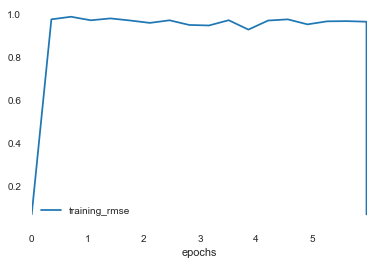

In [73]:
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='epochs', y = ['training_rmse'])

In [77]:
err=(fraud_dl.anomaly(data)).cbind(C)

In [78]:
err

Reconstruction.MSE,Class
0.0113886,0
0.0114272,0
0.0136378,0
0.0156381,0
0.0127106,0
0.0112056,0
0.0122937,0
0.0132856,0
0.0130217,0
0.0123225,0


In [85]:
err=err.as_data_frame()

In [89]:
err=tf.cast(err.values, tf.float32)

In [90]:
err

<tf.Tensor: shape=(284807, 2), dtype=float32, numpy=
array([[0.0113886 , 0.        ],
       [0.01142721, 0.        ],
       [0.01363784, 0.        ],
       ...,
       [0.00925165, 0.        ],
       [0.01198011, 0.        ],
       [0.00853192, 0.        ]], dtype=float32)>

In [91]:
#find correlation between reconstruction error and fraud flag

tfp.stats.correlation(
    err, y=None, sample_axis=0, event_axis=-1, keepdims=False, name=None
)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.        , 0.27698478],
       [0.27698478, 0.9999914 ]], dtype=float32)>

In [116]:
#fit a glm to access if reconstruction error is a predictor of fraud

tfp.glm.fit(
    model_matrix=err, response=err[:,1], model=tfp.glm.Bernoulli(), model_coefficients_start=None,
    predicted_linear_response_start=None, l2_regularizer=None, dispersion=None,
    offset=None, convergence_criteria_fn=None, learning_rate=None,
    fast_unsafe_numerics=True, maximum_iterations=1,
    l2_regularization_penalty_factor=None, name=None
)

[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-309.36588 ,    9.777487], dtype=float32)>,
 <tf.Tensor: shape=(284807,), dtype=float32, numpy=
 array([-3.5232444, -3.535189 , -4.219081 , ..., -2.8621435, -3.7062378,
        -2.6394863], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=int32, numpy=1>]

In [118]:
def logit2prob(logit):
  odds = tf.exp(logit)
  prob = odds / (1.000 + odds)
  return(prob)
logit2prob(9.777487)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9999433>

In [122]:
h2o.shutdown()

C:\Users\Michael Lanier\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_8c3c closed.
